# Aula 20/08/2024

## Parte prática sobre freqüências

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pd.__version__

'2.2.2'

In [3]:
df = pd.read_csv('../data/housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

<Axes: >

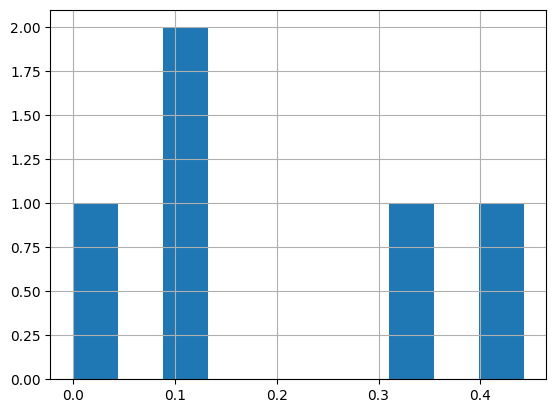

In [6]:
df['ocean_proximity'].value_counts(normalize=True).hist()

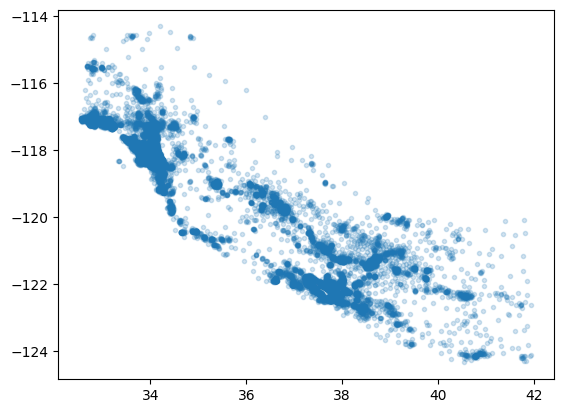

In [7]:
plt.scatter(df['latitude'], df.longitude, alpha=0.2, marker=".")

----

# Aula 27/08/2024

## Representação Gráfica de Resultados

Aula passada vimos como representar as variáveis quantitativas e qualitativas usando tabelas e como resumir estes dados usando freqüências.

Aula de hoje:

    - Representação Gráfica de Resultados:
        - Para variáveis qualitativas
        - Para variáveis quantitativas

### Introdução

O comportamento dos dados de variáveis qualitativas e quantitativas também pode ser representado graficamente - uma representação de dados numéricos na forma de figuras geométricas, o que permite uma visualização rápida dos gráficos.

A biblioteca mais usada e básica do Python para geração de gráficos é o `matplotlib`. No início deste arquivo, temos a sua importação padrão. Veremos como usá-la a medida que formos construíndo os exemplos.

### Representação de gráfica para variáveis qualitativas

Temos 3 principais tipos de gráficos para variáveis qualitativas:
    - gráfico de barras
    - gráfico de setores
    - diagrama de Pareto

i. **gráfico de barras**





Abaixo foi gerado um `pandas.DataFrame` para usarmos como exemplo.    

In [12]:
satisfacao = np.array(["Excelente", "Bom", "Regular", "Ruim"])
freq_absoluta = np.array([58, 18, 32, 12])
freq_por_categoria = pd.DataFrame()
freq_por_categoria["Satisfação"] = satisfacao
freq_por_categoria["Freqüência Absoluta (%)"] = freq_absoluta

In [13]:
freq_por_categoria

,Satisfação,Freqüência Absoluta (%)
0,Excelente,58
1,Bom,18
2,Regular,32
3,Ruim,12


Text(0.5, 0, 'Satisfação')

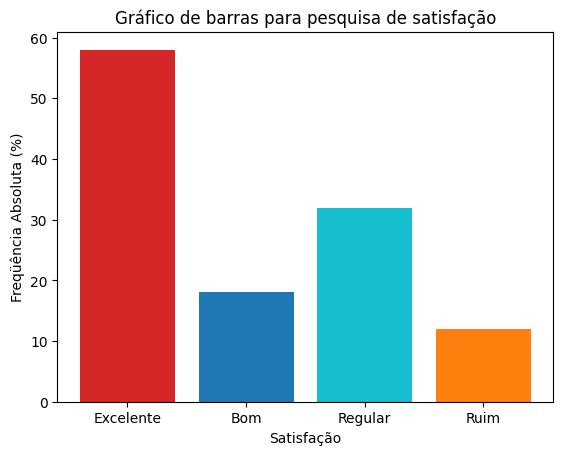

In [32]:
bar_colors = ['tab:red', 'tab:blue', 'tab:cyan', 'tab:orange']

plt.bar(freq_por_categoria["Satisfação"],
        freq_por_categoria["Freqüência Absoluta (%)"],
        color=bar_colors)

plt.title("Gráfico de barras para pesquisa de satisfação")
plt.ylabel("Freqüência Absoluta (%)")
plt.xlabel("Satisfação")

bar_colors = ['tab:red', 'tab:blue', 'tab:cyan', 'tab:orange']

plt.barh(freq_por_categoria["Satisfação"],
        freq_por_categoria["Freqüência Absoluta (%)"],
        color=bar_colors,)

plt.title("Gráfico de barras para pesquisa de satisfação")
plt.xlabel("Freqüência Absoluta (%)")
plt.ylabel("Satisfação")

### Diagrama de Pareto

É uma ferramenta de qualidade e tem como objetivo inverstigar os tipos de problemas e identificar suas causas. Isto permite que alguma ação possa ser tomada para sanar tais problemas.

Ele é formado por um gráfico de barras verticais, combinado com um gráfico de linhas, onde

    - Barras: representam as freqncias absolutas de ocorrências dos problemas.
    - Linhas: representam as freqüências relativas acumuladas.

Ordenamos os problemas em ordem crescente de prioridade.


In [48]:
# Data set para exemplo

problemas_relatados = pd.DataFrame()
problemas_relatados["Tipo de de Defeito"] = ["Amassado", "Perfurado", "Impressão Digital", "Caracteres Errados",
                                 "Números Errados", "Outros", "Total"]
problemas_relatados["Freqüência Relativa (%)"] = [71, 28, 12, 20, 44, 6, 181]

In [49]:
problemas_relatados

,Tipo de de Defeito,Freqüência Relativa (%)
0,Amassado,71
1,Perfurado,28
2,Impressão Digital,12
3,Caracteres Errados,20
4,Números Errados,44
5,Outros,6
6,Total,181


Precisamos completar o dataframe acima com uma coluna de freqüências relativas acumuladas.

In [53]:
problemas_relatados['% acumulado'] = 100*(problemas_relatados["Freqüência Relativa (%)"].cumsum()) / (problemas_relatados["Freqüência Relativa (%)"].sum())

In [55]:
problemas_relatados

,Tipo de de Defeito,Freqüência Relativa (%),% acumulado
0,Amassado,71,19.613260
1,Perfurado,28,27.348066
2,Impressão Digital,12,30.662983
3,Caracteres Errados,20,36.187845
4,Números Errados,44,48.342541
5,Outros,6,50.000000
6,Total,181,100.000000


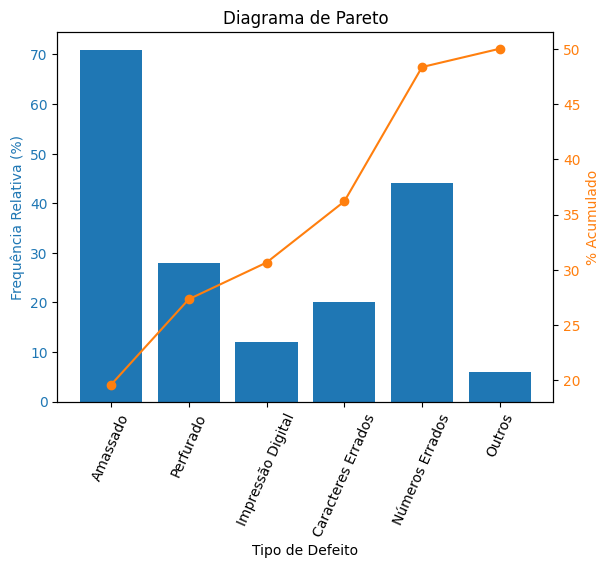

In [57]:
# Dados do dataframe
tipos_de_defeito = ['Amassado', 'Perfurado', 'Impressão Digital', 'Caracteres Errados', 'Números Errados', 'Outros']
frequencia_relativa = [71, 28, 12, 20, 44, 6]
percentual_acumulado = [19.613260, 27.348066, 30.662983, 36.187845, 48.342541, 50.000000]

# Configurar o gráfico
fig, ax1 = plt.subplots()

# Gráfico de barras
ax1.bar(tipos_de_defeito, frequencia_relativa, color='C0')
ax1.set_xlabel('Tipo de Defeito')
ax1.set_ylabel('Frequência Relativa (%)', color='C0')
ax1.tick_params(axis='y', labelcolor='C0')

plt.xticks(rotation=66)

# Gráfico de linha para % acumulado
ax2 = ax1.twinx()
ax2.plot(tipos_de_defeito, percentual_acumulado, color='C1', marker='o', linestyle='-')
ax2.set_ylabel('% Acumulado', color='C1')
ax2.tick_params(axis='y', labelcolor='C1')

# Título do gráfico
plt.title('Diagrama de Pareto')

# Exibir o gráfico
plt.show()


**Análise do gráfico acima**

Identificação dos Principais Defeitos:

- O defeito mais frequente é o "Amassado", responsável por 71 ocorrências, o que representa a maior parte das falhas observadas.
"Números Errados" também apresenta uma alta frequência relativa, com 44 ocorrências, seguido por "Perfurado" (28 ocorrências) e "Caracteres Errados" (20 ocorrências).


- Regra de Pareto (80/20): A análise sugere que a maioria dos defeitos (quase 80% do total acumulado) é causada por uma pequena porcentagem dos tipos de defeitos. Especificamente, os defeitos "Amassado", "Números Errados" e "Perfurado" juntos correspondem a cerca de 76% do total acumulado. Esse padrão segue o princípio de Pareto, onde uma pequena quantidade de causas (neste caso, tipos de defeitos) é responsável pela maior parte dos problemas.

- Foco de Melhorias: Com base na análise, os esforços de melhoria devem ser concentrados nos tipos de defeitos mais frequentes, principalmente "Amassado" e "Números Errados", pois a redução desses defeitos poderia resultar em uma significativa melhoria na qualidade do processo.

- Defeitos Menos Relevantes: O gráfico também indica que defeitos como "Outros" e "Impressão Digital" possuem uma frequência muito menor e contribuem pouco para o total acumulado de defeitos. A princípio, esses defeitos podem ser priorizados em segundo plano em relação aos mais frequentes.

- Conclusão: O diagrama acima nos mostra que atacar as causas principais de defeitos, especialmente aquelas que dominam a primeira parte da curva de frequência acumulada, é uma estratégia eficiente para a melhoria da qualidade. Concentrar esforços em reduzir os defeitos "Amassado" e "Números Errados" poderia levar a uma significativa redução no número total de defeitos.

---

### Para Variáveis Quantitativas

Um gráfico amplamente usado em variáveis quantitativas é o **gráfico de linhas**.
Vamos ver um exemplo dele.

In [62]:
# Dataset

# Gerar meses de janeiro a dezembro
meses = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']

# Gerar valores de probabilidades de perdas (%) aleatórios entre 0.1 e 0.99
probabilidades_perdas = np.random.uniform(0.1, 0.99, len(meses))

# Criar o DataFrame
df = pd.DataFrame({
    'Mês': meses,
    'Perda (%)': probabilidades_perdas
})

# Exibir o DataFrame
print(df)

          Mês  Perda (%)
0     Janeiro   0.964417
1   Fevereiro   0.926710
2       Março   0.397685
3       Abril   0.947855
4        Maio   0.231340
5       Junho   0.426864
6       Julho   0.721906
7      Agosto   0.110851
8    Setembro   0.703327
9     Outubro   0.155219
10   Novembro   0.396372
11   Dezembro   0.640796


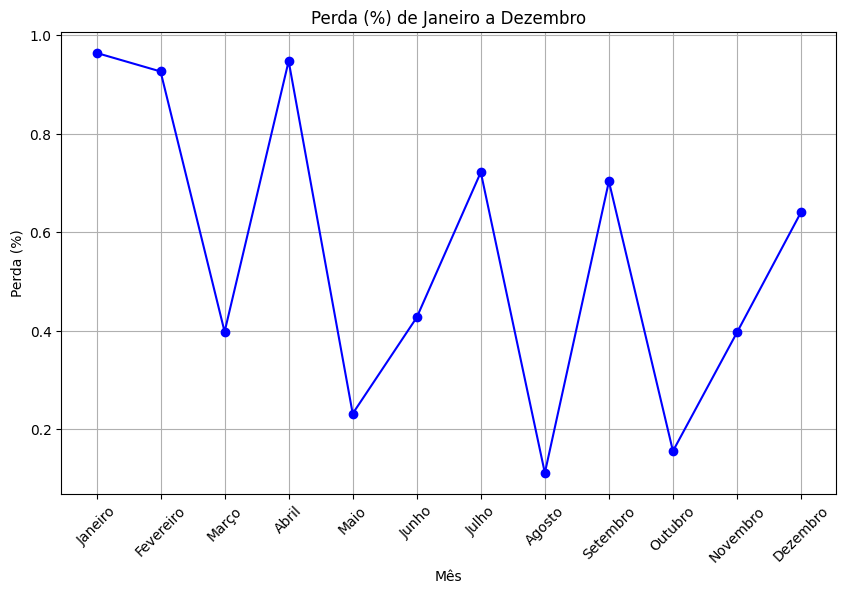

In [65]:
# Plotar o gráfico de linhas
plt.figure(figsize=(10, 6))
plt.plot(df['Mês'], df['Perda (%)'], marker='o', linestyle='-', color='b')

# Configurar título e rótulos dos eixos
plt.title('Perda (%) de Janeiro a Dezembro')
plt.xlabel('Mês')
plt.ylabel('Perda (%)')

# Ajuste da rotação das labels do eixo X para melhor legibilidade
plt.xticks(rotation=45)

# Exibir o gráfico
plt.grid(True)  # Adicionar uma grade para facilitar a leitura

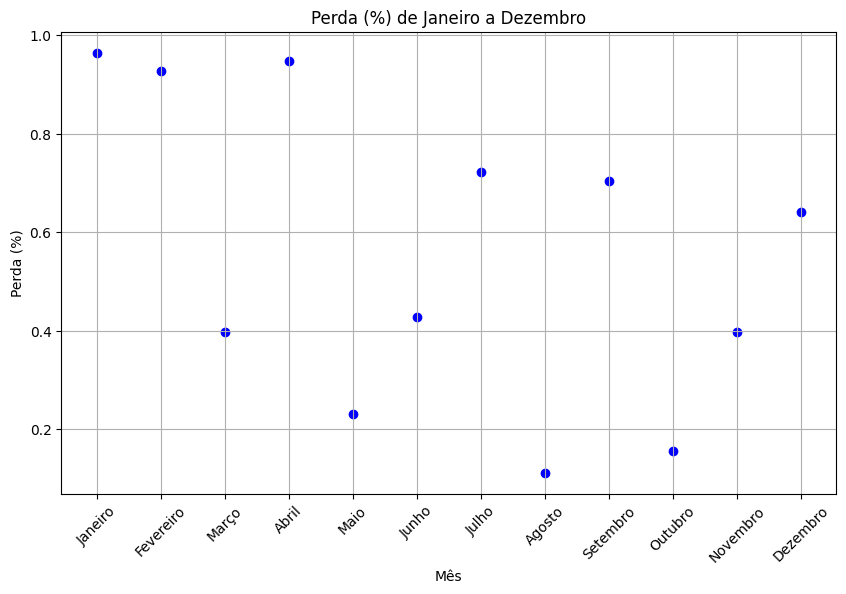

In [66]:
# Plotar o gráfico de linhas
plt.figure(figsize=(10, 6))
plt.scatter(df['Mês'], df['Perda (%)'], marker='o', linestyle='-', color='b')

# Configurar título e rótulos dos eixos
plt.title('Perda (%) de Janeiro a Dezembro')
plt.xlabel('Mês')
plt.ylabel('Perda (%)')

# Ajuste da rotação das labels do eixo X para melhor legibilidade
plt.xticks(rotation=45)

# Exibir o gráfico
plt.grid(True)  # Adicionar uma grade para facilitar a leitura